<a href="https://colab.research.google.com/github/SHIVAA17/Twitter_Sentiment_Analysis/blob/main/twitterSentimentAnalyis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>TWITTER SENTIMENT ANALYSIS</h1>**

In [1]:
#Importing the Libraries
import tweepy 
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re                             #for substitution of words
plt.style.use('fivethirtyeight')

In [2]:
#Loading the file that contains keys
from google.colab import files
uploaded = files.upload()

Saving Login.csv to Login.csv


In [3]:
log = pd.read_csv('Login.csv')
# log.head()

In [5]:
consumerKey = log.key_value[0]
consumerKeySecret = log.key_value[1]
accessToken = log.key_value[2]
AccessTokenSecret = log.key_value[3]



In [7]:
authenicate = tweepy.OAuthHandler(consumerKey,consumerKeySecret)

authenicate.set_access_token(accessToken,AccessTokenSecret)

api = tweepy.API(authenicate,wait_on_rate_limit =True)





In [9]:
posts = api.user_timeline(screen_name = "BillGates",count = 100,lang = "en",tweet_mode = "extended")

print("Last five tweets are as follows")
for tweet in posts[0:5]:
  print(tweet.full_text  + '\n')

Last five tweets are as follows
Conversations about building a brighter future are essential to driving progress. And when the topic is clean energy, I'm always excited to listen. https://t.co/fagifaBur6

When I transitioned from @Microsoft to working full-time at the @GatesFoundation, I finally had the time to learn more about physics, chemistry, biology, and other sciences. So, I looked around for the best books and read as many of them as I could find. https://t.co/z2D5xGSeMj

I’m excited about @gatesfoundation’s new podcast. The opportunities to reduce inequity are out there, and @JenHatmaker does a wonderful job of showcasing innovative solutions to pressing global issues. https://t.co/Xalos3mSeP

With the right mindset, progress is possible. https://t.co/v8ov4OlqZ2

This is how close we are to truly self-driving cars (info from @SAEIntl). I believe we’ll reach a tipping point within the next decade. When we do, AVs will change transportation as dramatically as the PC changed offi

In [10]:
#creating  a dataframe with column called tweets

df = pd.DataFrame([tweet.full_text for tweet in posts],columns = ['Tweets'])
df.head()

,Tweets
0,Conversations about building a brighter future...
1,When I transitioned from @Microsoft to working...
2,I’m excited about @gatesfoundation’s new podca...
3,"With the right mindset, progress is possible. ..."
4,This is how close we are to truly self-driving...


In [11]:
# cleaning the text

def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+','',text)  # removing @mentions
  text = re.sub(r'#','',text)             # removing hash symbols
  text = re.sub(r'RT[\s]+','',text)
  text = re.sub(r'https?:\/\/\S+','',text)  # remove the hyperlinks

  return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

df


,Tweets
0,Conversations about building a brighter future...
1,When I transitioned from to working full-time...
2,I’m excited about ’s new podcast. The opportun...
3,"With the right mindset, progress is possible."
4,This is how close we are to truly self-driving...
...,...
95,Many people don’t know that Mike was a champio...
96,I’m very sad to hear about Michael Gerson’s pa...
97,It was a pleasure to join this roundtable to...
98,_com: is excited to host Bill Gates in an exc...


In [12]:
#
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity


def getPolarity(text):
  return TextBlob(text).sentiment.polarity


df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df



,Tweets,Subjectivity,Polarity
0,Conversations about building a brighter future...,0.468750,0.185417
1,When I transitioned from to working full-time...,0.535000,0.375000
2,I’m excited about ’s new podcast. The opportun...,0.640909,0.402273
3,"With the right mindset, progress is possible.",0.767857,0.142857
4,This is how close we are to truly self-driving...,0.000000,0.000000
...,...,...,...
95,Many people don’t know that Mike was a champio...,0.266667,0.500000
96,I’m very sad to hear about Michael Gerson’s pa...,0.472222,0.016667
97,It was a pleasure to join this roundtable to...,0.386111,0.300000
98,_com: is excited to host Bill Gates in an exc...,0.750000,0.375000


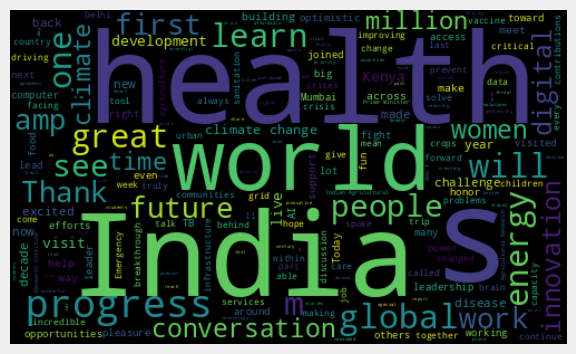

In [13]:
#plot the word cloud

allWords = ''.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500,height = 300,random_state = 24,max_font_size = 119).generate(allWords)

plt.imshow(wordCloud,interpolation = "bilinear")
plt.axis('off')
plt.show()


In [14]:
# to create a funtion determining positive,neutral and negative

def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,Conversations about building a brighter future...,0.468750,0.185417,Positive
1,When I transitioned from to working full-time...,0.535000,0.375000,Positive
2,I’m excited about ’s new podcast. The opportun...,0.640909,0.402273,Positive
3,"With the right mindset, progress is possible.",0.767857,0.142857,Positive
4,This is how close we are to truly self-driving...,0.000000,0.000000,Neutral
...,...,...,...,...
95,Many people don’t know that Mike was a champio...,0.266667,0.500000,Positive
96,I’m very sad to hear about Michael Gerson’s pa...,0.472222,0.016667,Positive
97,It was a pleasure to join this roundtable to...,0.386111,0.300000,Positive
98,_com: is excited to host Bill Gates in an exc...,0.750000,0.375000,Positive


In [15]:
#print all positive tweets

j=1
sortedDF = df.sort_values(by = ['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]  == 'Positive'):
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j = j+1

1)Conversations about building a brighter future are essential to driving progress. And when the topic is clean energy, I'm always excited to listen. 

2)When I transitioned from  to working full-time at the , I finally had the time to learn more about physics, chemistry, biology, and other sciences. So, I looked around for the best books and read as many of them as I could find. 

3)I’m excited about ’s new podcast. The opportunities to reduce inequity are out there, and  does a wonderful job of showcasing innovative solutions to pressing global issues. 

4)With the right mindset, progress is possible. 

5)I’m a car guy who enjoys the meditative (and fun) aspects of driving–but I’m also eagerly anticipating the day when I can hand over the keys to a machine. 

6)Thank you  for your continued leadership. We look forward to building on ’s progress and saving millions more lives. 

7)Thank you . I look forward to continuing our work together improving health, reducing poverty, and promot

In [16]:
#print all negative tweets
j=1
sortedDF = df.sort_values(by = ['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ')' +sortedDF['Tweets'][i])
    print()
    j = j+1


1)I had the honor of working with Gordon Moore in his capacities as a technologist, businessman, and philanthropist. The life he led and legacy he leaves behind will continue to inspire me and millions of others:  

2)I give a crap about the way crap gets disposed of. Because there’s no time to waste when it comes to waste management. Improving sanitation vastly enhances the quality of life for people around the world. WorldWaterDay 

3)The development of AI is as fundamental as the creation of the microprocessor, the personal computer, the Internet, and the mobile phone. It will change the way people work, learn, travel, get health care, and communicate with each other. 

4)A phenomenal story about how innovation is helping treat diseases previously thought to be incurable. 

5): What do all these numbers mean?

Math helps students answer that question and make sense of the world around them — on PiDay…

6): Mr. visited RBI Mumbai today and held wide ranging discussions with Governor 

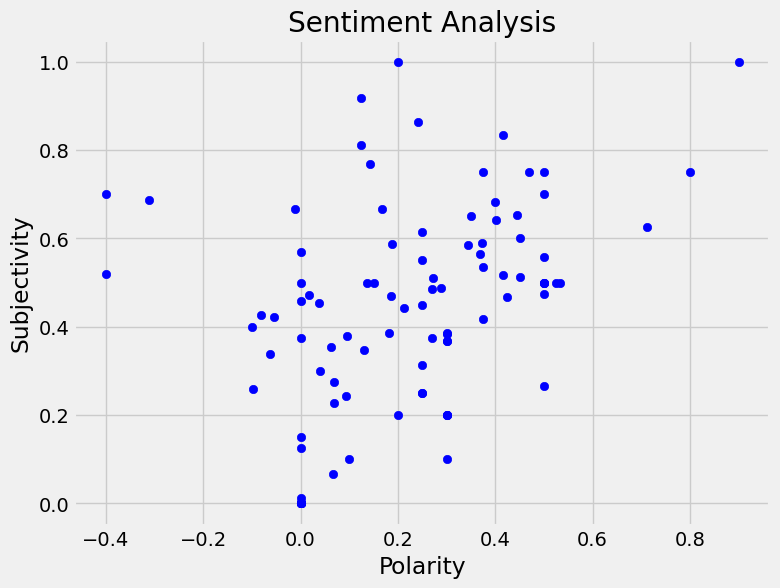

In [17]:
#plot 
plt.figure(figsize = (8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [18]:
# Calucting the percentage of positive Tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0])*100,1)

71.0

In [19]:
# Calucting the percentage of Negative Tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0]/df.shape[0])*100,1)

9.0

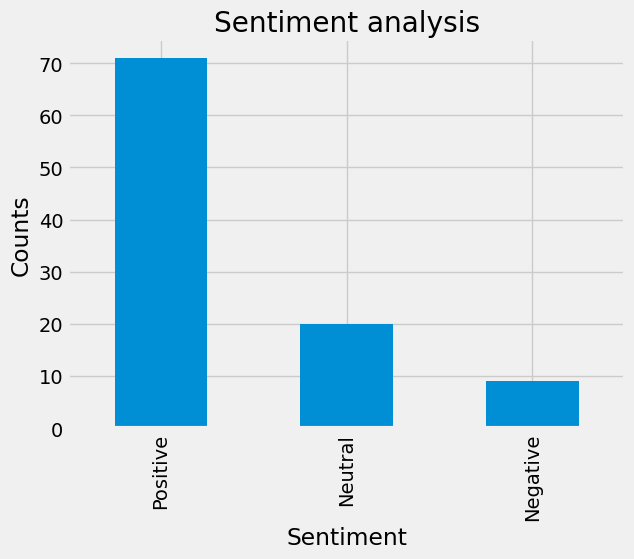

In [20]:
df['Analysis'].value_counts()

plt.title('Sentiment analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()